<a href="https://colab.research.google.com/github/sipocz/Programming_language_classification/blob/main/Programming_language_ID_convolution_20220101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

In [8]:
!pip install NLTK
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
! pip install emoji
import emoji

     |████████████████████████████████| 170 kB 4.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=72c53cb52b03f5020bbb245e9679965cd802b8e91fbe7a87585dd679ad5bbc0f
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [10]:

emoji.demojize("hello 👍")

'hello :thumbs_up:'

##Szószedet

In [11]:
train_file_url="https://github.com/sipocz/Programming_language_classification/raw/e61a328b63d89bc7f3ca744fefcbf9b162fe52c5/orig/train.csv"
test_file_url="https://github.com/sipocz/Programming_language_classification/raw/e61a328b63d89bc7f3ca744fefcbf9b162fe52c5/orig/test.csv"

In [12]:
!rm *train*
!rm *test*

!wget $train_file_url
!wget $test_file_url



rm: cannot remove '*train*': No such file or directory
rm: cannot remove '*test*': No such file or directory
--2022-01-01 12:47:30--  https://github.com/sipocz/Programming_language_classification/raw/e61a328b63d89bc7f3ca744fefcbf9b162fe52c5/orig/train.csv
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Programming_language_classification/e61a328b63d89bc7f3ca744fefcbf9b162fe52c5/orig/train.csv [following]
--2022-01-01 12:47:30--  https://raw.githubusercontent.com/sipocz/Programming_language_classification/e61a328b63d89bc7f3ca744fefcbf9b162fe52c5/orig/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response

In [13]:
df_test=pd.read_csv("test.csv")
df_test.head()



id                                               code
0  10684  28 = 22 + 23 + 24\n\n 33 = 32 + 23 + 24\n\n 49...
1  17536        this.path = path;\n\n       this.estimat...
2  26383                      {\n\n                     ...
3  29090  /**\n\n  * Class for converting from "any" bas...
4  10482          { cout<<"Destructing base \n"; }      ...

In [14]:
df_train=pd.read_csv("train.csv")


In [15]:
df_train.head(10)

id                                               code     language
0  14026              var result = testObj1 | testObj2;\...      c-sharp
1  12201          ///     Initializes a new instance of ...      c-sharp
2  17074  /*\n\n     Explanation :- a user gives a Strin...   javascript
3  21102          int sum = 0;\n\n         for (int i = ...  c-plus-plus
4  53065          if (p->data < min)\n\n         {\n\n  ...            c
5  29901      >>> insertion_sort([]) == sorted([])\n\n  ...       python
6  32980   * @details The Trie data structure is impleme...  c-plus-plus
7  22010   */\n\n static void test() {\n\n     data_stru...  c-plus-plus
8  80574  # => 2\n\n puts remove_elements([0, 1, 2, 2, 3...         ruby
9  35990      // graph is represented as an array of edg...            c

In [16]:
languages=set(df_train.language)

In [17]:
len(languages)

15

In [18]:
test=list(df_test.code)
train=list(df_train.code)


In [19]:
def decorate_list(inpstr:str):
    aa=inpstr.split()
    i=0
    print("'''")
    for a in aa:
        print(a, end=" ")
        i+=1
        if i % 10==0:
            print("", end="\n")
    print("\n'''")

In [20]:
alltext=train+test

In [21]:
keywords_swift='''
Class deinit Enum extension Func import Init operator private protocol 
public static struct subscript break case continue default do else 
for return switch where while as false is dynamicType super 
true _COLUMN_ Let in _FILE_ internal typealias if nil var 
self unowned _FUNCTION_ _LINE_ associativity convenience dynamic didSet precedence final 
get infix inout right set type lazy left mutating none 
weak willSet prefix nonmutating optional override postfix Protocol required 
'''

In [22]:
keywords_ruby='''
BEGIN END alias and begin break case class def module 
next nil not or redo rescue retry return elsif end 
false ensure for if true undef unless do else super 
then until when while defined? self 
'''

In [23]:
keywords_php='''
__halt_compiler abstract and array as break callable case catch class 
clone const continue declare default die do echo else elseif 
empty enddeclare endfor endforeach endif endswitch endwhile eval exit extends 
final finally fn for foreach function global goto if implements 
include include_once instanceof insteadof interface isset list match namespace new 
or print private protected public readonly require require_once return static 
switch throw trait try unset use var while xor yield 
yield from 
'''

In [24]:
keywords_scala='''
abstract case catch class def do else extends false final 
finally for forSome if implicit import lazy macro match new 
null object override package private protected return sealed super this 
throw trait try true type val var while with yield 

'''

In [25]:
keywords_julia='''
@doc_str do macrocall struct __dot__ end memq toplevel _cmd eqv 
memv true _str false module try abstract finally mutable tuple 
bitstype for none type block function parameters typealias call global 
primitive typed_comprehension catch if quote typed_hcat cell1d kw ref typed_vcat 
comparison line return vect const local row where curly macro 
string 
'''

In [26]:
keywords_javascript='''
abstract arguments boolean break byte case catch char class const 
continue debugger default delete do double else enum eval export 
extends false final finally float for function goto if implements 
import in instanceof int interface let long native new null 
package private protected public return short static super switch synchronized 
this throw throws transient true try typeof var void volatile 
while with yield Array Date eval function hasOwnProperty Infinity isFinite 
isNaN isPrototypeOf length Math NaN name Number Object prototype String 
toString undefined valueOf 
'''

In [27]:
keywords_java='''
abstract assert boolean break byte case catch char class const 
continue default do double else enum extends final finally float 
for goto if implement imports instanceof int interface long native 
new package private protected public return short static strictfp super 
switch synchronized this throw throws transient try void volatile while 
false null true 
'''

In [28]:
keywords_go='''
break case chan const continue default defer else fallthrough for 
func go goto if import interface map package range return 
select struct switch type var 
'''

In [29]:
keywords_f_sharp='''
atomic break checked component const constraint constructor continue eager fixed 
fori functor include method mixin object parallel params process protected 
pure sealed tailcall trait virtual volatile 
'''

In [30]:
keywords_dart='''
assert break case catch class const continue default do else 
enum extends false final finally for if in is new 
null rethrow return super switch this throw true try var 
void while with 
'''

In [31]:
keywords_c='''
auto break case char const continue default do double else 
enum extern float for goto if int long register return 
short signed sizeof static struct switch typedef union unsigned void 
volatile while 
'''


In [32]:
keywords_python='''
False await else import pass None break except in raise 
True class finally is return and continue for lambda try 
as def from nonlocal while assert del global not with 
async elif if or yield 
'''

In [33]:
keywords_cpp='''
alignas double reinterpret_cast alignof dynamic_cast requires and else return and_eq 
enum short asm explicit signed atomic_cancel export sizeof atomic_commit extern 
static atomic_noexcept false static_assert auto float static_cast bitand for struct 
bitor friend switch bool goto synchronized break if template case 
import this catch inline thread_local char int throw char16_t long 
true char32_t module try class mutable typedef compl namespace typeid 
concept new typename const noexcept union constexpr not unsigned const_cast 
not_eq using continue nullptr virtual co_await operator void co_return or 
volatile co_yield or_eq wchar_t decltype private while default protected xor 
delete public xor_eq do register 
'''

In [34]:
keywords_c_sharp='''
abstract as base bool break byte case catch char checked 
class const continue decimal default delegate do double else enum 
event explicit extern false finally fixed float for foreach goto 
if implicit in int interface internal is lock long namespace 
new null object operator out override params private protected public 
readonly ref return sbyte sealed short sizeof stackalloc static string 
struct switch this throw true try typeof uint ulong unchecked 
unsafe ushort using virtual void volatile while 
'''

In [35]:
keywords_r='''
if else repeat while function for in next break TRUE 
FALSE NULL Inf NaN NA NA_integer_ NA_real_ NA_complex_ NA_character_ ... 
'''

In [36]:
def keyword_convert(keystr:str):
    keywords_list=keystr.split()
    out=["_"+c+"_" for c in keywords_list]
    return(out)

In [37]:
languages

{'R',
 'c',
 'c-plus-plus',
 'c-sharp',
 'dart',
 'f-sharp',
 'go',
 'java',
 'javascript',
 'julia',
 'php',
 'python',
 'ruby',
 'scala',
 'swift'}

In [38]:
list_of_pogramming_languages=(keywords_r,keywords_c,keywords_cpp,keywords_c_sharp,keywords_dart,
                             keywords_f_sharp,keywords_go,keywords_java,keywords_javascript,
                             keywords_julia,keywords_php,keywords_python,keywords_ruby,
                             keywords_scala,keywords_swift
)

In [39]:
def create_keyword_set(prog_key_list:list):
    output=[]
    for keys in prog_key_list:
        #print(keys)
        setx=keyword_convert(keys)
        output=output+setx
        #print(output)
    out=set(output)
    outdict={o[1:-1]:o for o in out}
    print(outdict)
    return(outdict)

In [40]:
keyword_dict=create_keyword_set(list_of_pogramming_languages)

{'short': '_short_', 'float': '_float_', 'defer': '_defer_', 'operator': '_operator_', 'undef': '_undef_', 'protocol': '_protocol_', 'toString': '_toString_', 'func': '_func_', '_str': '__str_', 'static_cast': '_static_cast_', 'callable': '_callable_', 'precedence': '_precedence_', 'dynamic': '_dynamic_', 'next': '_next_', 'when': '_when_', 'typedef': '_typedef_', 'while': '_while_', 'require': '_require_', 'for': '_for_', 'method': '_method_', 'if': '_if_', 'nonmutating': '_nonmutating_', 'extern': '_extern_', 'implicit': '_implicit_', 'eager': '_eager_', 'fori': '_fori_', 'left': '_left_', 'elif': '_elif_', 'throws': '_throws_', 'hasOwnProperty': '_hasOwnProperty_', 'thread_local': '_thread_local_', 'set': '_set_', 'cell1d': '_cell1d_', 'Class': '_Class_', 'static_assert': '_static_assert_', 'didSet': '_didSet_', 'enum': '_enum_', 'volatile': '_volatile_', 'boolean': '_boolean_', 'type': '_type_', 'comparison': '_comparison_', 'unset': '_unset_', 'constructor': '_constructor_', 'nati

In [41]:
keyword_dict["checked"]

'_checked_'

In [68]:
import re

def remove_URL(text):
    """Remove URLs from a text string"""
    return re.sub(r"http\S+", "", text)

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def is_number(inp:str):
    a=re.search("[\d]",inp)
    if a==None: 
        return(False)
    return(True)

def strip_all_entities(text):
    import emoji
    import re,string
    entity_prefixes = ['“','@','#',"!","?"]
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

def query_sentence(alltext:list,index:int):
    print(f"orig: {alltext[index]}")
    
    inp=alltext[index]
    inp=remove_URL(inp)
    inp=emoji.demojize(inp)
    txt=inp
    #inp=strip_all_entities(inp)
    txt=txt.replace("_"," _underline_ ")
    txt=re.sub("[-+]?[0-9]*\.?[0-9]+(e[-+]?[0-9]+)?"," _number_ ",txt) #numeric
    txt=re.sub("[\"]?[\w]*[\"]"," _string_ ",txt) #string
    txt=re.sub("[\']?[\w]*[\']"," _string_ ",txt) #string
    


    txt=txt.replace(","," _comma_ ").replace("."," _point_ ").replace("!"," _exclamation_ ").replace("#"," _hashmark_ ").replace("???","?").replace("??","?").replace("?"," _questionmark_ ")
    txt=txt.replace("  "," ").replace("*"," _star_ ").replace('"'," _apostrofe_ ").replace("“"," _apostrofe_ ").replace("'"," _apostrofe_ ")
    txt=txt.replace("=>"," _identical_ ").replace("="," _equal_ ").replace("-"," _minus_ ").replace("^"," _powerup_ ")
    txt=txt.replace("["," _crotchets_open_ ").replace("]"," _crotchets_close_ ").replace("{"," _brace_open_ ").replace("}"," _brace_close_ ").replace("("," _bracket_open_ ").replace(")"," _bracket_close_ ")
    txt=txt.replace("\n"," _new_line_ ").replace("\t"," _tab_ ").replace(";"," _semicolon_ ").replace(":"," _colon_ ").replace("&"," _AND_ ").replace("|"," _OR_ ").replace("\\"," _switch_char_ ")
    txt=txt.replace("<"," _smaller_sign_ ").replace(">"," _larger_sign_ ").replace("+"," _plus_ ").replace("$"," _dollar_ ").replace("/"," _division_ ")
    txt=txt.replace("%"," _percentage_ ").replace("@"," _at_sign_ ")
    txt=txt.replace("~"," _wiggle_ ")

    
    
    #txt=txt.lower()
    print("after replace=",txt)
    #print(txt)
    normal=""
    #keyword dict usage
    for i in txt.split(" "):
        w1=i.strip()
        if w1 in keyword_dict:
            w1=keyword_dict[w1]
            #print(w1)
        #print("**"+w1+"**")
        if len (w1)!=0:
            if w1[0]!="_" and w1[-1]!="_":
                w1="_"+w1.upper()+"_"
        #print("--"+w1+"--")
        normal += w1+" "

    print(f"  conv: {normal}")
    return(normal)

def convert_sentence(sent):
    #print(f"orig: {sent}")
    
    inp=sent
    inp=remove_URL(inp)
    inp=emoji.demojize(inp)
    txt=inp
    #inp=strip_all_entities(inp)
    txt=txt.replace("_"," _underline_ ")
    txt=re.sub("[-+]?[0-9]*\.?[0-9]+(e[-+]?[0-9]+)?"," _number_ ",txt) #numeric
    txt=re.sub("[\"]?[\w]*[\"]"," _string_ ",txt) #string
    txt=re.sub("[\']?[\w]*[\']"," _string_ ",txt) #string
    


    txt=txt.replace(","," _comma_ ").replace("."," _point_ ").replace("!"," _exclamation_ ").replace("#"," _hashmark_ ").replace("???","?").replace("??","?").replace("?"," _questionmark_ ")
    txt=txt.replace("  "," ").replace("*"," _star_ ").replace('"'," _apostrofe_ ").replace("“"," _apostrofe_ ").replace("'"," _apostrofe_ ")
    txt=txt.replace("=>"," _identical_ ").replace("="," _equal_ ").replace("-"," _minus_ ").replace("^"," _powerup_ ")
    txt=txt.replace("["," _crotchets_open_ ").replace("]"," _crotchets_close_ ").replace("{"," _brace_open_ ").replace("}"," _brace_close_ ").replace("("," _bracket_open_ ").replace(")"," _bracket_close_ ")
    txt=txt.replace("\n"," _new_line_ ").replace("\t"," _tab_ ").replace(";"," _semicolon_ ").replace(":"," _colon_ ").replace("&"," _AND_ ").replace("|"," _OR_ ").replace("\\"," _switch_char_ ")
    txt=txt.replace("<"," _smaller_sign_ ").replace(">"," _larger_sign_ ").replace("+"," _plus_ ").replace("$"," _dollar_ ").replace("/"," _division_ ")
    txt=txt.replace("%"," _percentage_ ").replace("@"," _at_sign_ ")
    txt=txt.replace("~"," _wiggle_ ")

    
    
    #txt=txt.lower()
    #print("after replace=",txt)
    #print(txt)
    normal=""
    #keyword dict usage
    for i in txt.split(" "):
        w1=i.strip()
        if w1 in keyword_dict:
            w1=keyword_dict[w1]
            #print(w1)
        #print("**"+w1+"**")
        if len (w1)!=0:
            if w1[0]!="_" and w1[-1]!="_":
                w1="_"+w1.upper()+"_"
        #print("--"+w1+"--")
        normal += w1+" "

    #print(f"  conv: {normal}")
    return(normal)

In [61]:
sent0=query_sentence(train,0)

orig:             var result = testObj1 | testObj2;

             // Assert

             Assert.AreEqual(expected, result.ToString());

         }

         [TestCase(1, 1, 1, 1, "1")]

         [TestCase(5, 3, 8, 4, "0000")]

after replace=       var result  _equal_  testObj _number_  _OR_  testObj _number_  _semicolon_  _new_line_  _new_line_         _division_  _division_  Assert _new_line_  _new_line_        Assert _point_ AreEqual _bracket_open_ expected _comma_ result _point_ ToString _bracket_open_  _bracket_close_  _bracket_close_  _semicolon_  _new_line_  _new_line_       _brace_close_  _new_line_  _new_line_       _crotchets_open_ TestCase _bracket_open_  _number_ _comma_  _number_ _comma_  _number_ _comma_  _number_ _comma_  _string_ _number_ _string_  _bracket_close_  _crotchets_close_  _new_line_  _new_line_       _crotchets_open_ TestCase _bracket_open_  _number_ _comma_  _number_ _comma_  _number_ _comma_  _number_ _comma_  _string_ _number_ _string_  _bracket_close_  _

In [62]:

token=nltk.word_tokenize(sent0)

In [48]:
len(train)

45628

In [72]:
def list_tokenizer(lin:list):
    l1=[]
    s1=set()
    i=0
    for list_element in lin:
        i+=1
        print(f"{i}",end=".")
        
        c1=convert_sentence(list_element)
        token=nltk.word_tokenize(c1)
        l1.append(token)
        s_token=set(token)
        s1=s1.union(s_token)
    return(s1,l1)


In [73]:
s_train,l_train=list_tokenizer(train)

1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.30.31.32.33.34.35.36.37.38.39.40.41.42.43.44.45.46.47.48.49.50.51.52.53.54.55.56.57.58.59.60.61.62.63.64.65.66.67.68.69.70.71.72.73.74.75.76.77.78.79.80.81.82.83.84.85.86.87.88.89.90.91.92.93.94.95.96.97.98.99.100.101.102.103.104.105.106.107.108.109.110.111.112.113.114.115.116.117.118.119.120.121.122.123.124.125.126.127.128.129.130.131.132.133.134.135.136.137.138.139.140.141.142.143.144.145.146.147.148.149.150.151.152.153.154.155.156.157.158.159.160.161.162.163.164.165.166.167.168.169.170.171.172.173.174.175.176.177.178.179.180.181.182.183.184.185.186.187.188.189.190.191.192.193.194.195.196.197.198.199.200.201.202.203.204.205.206.207.208.209.210.211.212.213.214.215.216.217.218.219.220.221.222.223.224.225.226.227.228.229.230.231.232.233.234.235.236.237.238.239.240.241.242.243.244.245.246.247.248.249.250.251.252.253.254.255.256.257.258.259.260.261.262.263.264.265.266.267.268.269.270.271.272.273.274.275.276.277.

In [74]:
len(s_train)

17666

In [75]:
s_test,l_test=list_tokenizer(test)

1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.30.31.32.33.34.35.36.37.38.39.40.41.42.43.44.45.46.47.48.49.50.51.52.53.54.55.56.57.58.59.60.61.62.63.64.65.66.67.68.69.70.71.72.73.74.75.76.77.78.79.80.81.82.83.84.85.86.87.88.89.90.91.92.93.94.95.96.97.98.99.100.101.102.103.104.105.106.107.108.109.110.111.112.113.114.115.116.117.118.119.120.121.122.123.124.125.126.127.128.129.130.131.132.133.134.135.136.137.138.139.140.141.142.143.144.145.146.147.148.149.150.151.152.153.154.155.156.157.158.159.160.161.162.163.164.165.166.167.168.169.170.171.172.173.174.175.176.177.178.179.180.181.182.183.184.185.186.187.188.189.190.191.192.193.194.195.196.197.198.199.200.201.202.203.204.205.206.207.208.209.210.211.212.213.214.215.216.217.218.219.220.221.222.223.224.225.226.227.228.229.230.231.232.233.234.235.236.237.238.239.240.241.242.243.244.245.246.247.248.249.250.251.252.253.254.255.256.257.258.259.260.261.262.263.264.265.266.267.268.269.270.271.272.273.274.275.276.277.

In [78]:
s_all=s_train.union(s_test)
l_all=l_train+l_test

In [ ]:
l_all_words=[]
maxx=len(l_all)
for i in range(len(l_all)):
    print(f"{i}/{maxx}%")
    l_all_words=l_all_words+l_all[i]


In [91]:
len(s_all)

18735

In [86]:
l_all_words[2]

'_equal_'

In [87]:
l_all_words.count("_equal_")

68519

In [ ]:
l_all_words_mini=[]
i=0
for aword in list(s_all):
    i+=1
    if i%10==0:
        print(f"{i}")
    w_count=l_all_words.count(aword)
    if w_count>1:
        l_all_words_mini.append(aword)


In [93]:
len(l_all_words_mini)

13772

In [99]:
wordlist_df=pd.DataFrame()
wordlist_df["Word_list"]=l_all_words_mini

In [100]:
wordlist_df.head()

Word_list
0        _MORSE_
1         _CDOT_
2        _float_
3      _MATSHOW_
4  _BINARYTESTS_

In [101]:
wordlist_df.to_csv("wordlist.csv")

In [106]:

def convert_sentence_lwordmini(sent):
    #print(f"orig: {sent}")
    
    inp=sent
    

    
    
    #txt=txt.lower()
    #print("after replace=",txt)
    #print(txt)
    normal=""
    #keyword dict usage
    for i in inp:
        w1=i
        if w1 in l_all_words_mini:
            w1=w1
        else:
            w1="_ID_"
        #print("--"+w1+"--")
        normal += w1+" "

    #print(f"  conv: {normal}")
    return(normal)

##Mentés

In [107]:
t_train=[]
i=0
for train_word in l_train:   #len(alltext)
    i+=1
    if i%10==0:
        print(f"{i}. {train_word}") 
    print(f"{i}", end=" ")
    t_train.append(convert_sentence_lwordmini(train_word))

1 2 3 4 5 6 7 8 9 10. ['_division_', '_division_', '_GRAPH_', '_is_', '_REPRESENTED_', '_as_', '_AN_', '_array_', '_OF_', '_EDGES_', '_point_', '_new_line_', '_new_line_', '_division_', '_division_', '_SINCE_', '_THE_', '_GRAPH_', '_is_', '_UNDIRECTED_', '_comma_', '_THE_', '_EDGE_', '_new_line_', '_new_line_', '_division_', '_division_', '_from_', '_SRC_', '_TO_', '_DEST_', '_is_', '_ALSO_', '_EDGE_', '_from_', '_DEST_', '_new_line_']
10 11 12 13 14 15 16 17 18 19 20. ['_division_', '_division_', '_division_', '_smaller_sign_', '_SUMMARY_', '_larger_sign_', '_new_line_', '_new_line_', '_division_', '_division_', '_division_', '_GETS_', '_A_', '_NEIGHBORS_', '_OF_', '_PARTICULAR_', '_VERTEX_', '_point_', '_new_line_', '_new_line_', '_division_', '_division_', '_division_', '_smaller_sign_', '_division_', '_SUMMARY_', '_larger_sign_', '_new_line_', '_new_line_', '_division_', '_division_', '_division_', '_smaller_sign_', '_PARAM_', '_name_', '_equal_', '_string_', '_larger_sign_', '_VER

In [108]:
t_test=[]
i=0
for test_word in l_test:   #len(alltext)
    i+=1
    if i%10==0:
        print(f"{i}. {test_word}") 
    print(f"{i}", end=" ")
    t_test.append(convert_sentence_lwordmini(test_word))

1 2 3 4 5 6 7 8 9 10. ['_brace_close_', '_new_line_', '_new_line_', '_division_', '_star_', '_star_', '_TEST_', '_function_', '_new_line_', '_new_line_', '_star_', '_at_sign_', '_RETURNS_', '_None_', '_new_line_', '_new_line_', '_star_', '_division_', '_new_line_', '_new_line_', '_static_', '_void_', '_TEST_', '_bracket_open_', '_bracket_close_', '_new_line_', '_new_line_', '_brace_open_', '_new_line_']
10 11 12 13 14 15 16 17 18 19 20. ['_A_', '_equal_', '_C_', '_star_', '_bracket_open_', '_bracket_open_', '_D_', '_smaller_sign_', '_smaller_sign_', '_number_', '_bracket_close_', '_minus_', '_C_', '_bracket_close_', '_semicolon_', '_new_line_', '_new_line_', '_B_', '_equal_', '_C_', '_star_', '_C_', '_plus_', '_D_', '_star_', '_D_', '_semicolon_', '_new_line_', '_new_line_', '_if_', '_bracket_open_', '_N_', '_percentage_', '_number_', '_equal_', '_equal_', '_number_', '_bracket_close_', '_division_', '_star_', '_IF_', '_N_', '_is_', '_EVEN_', '_star_', '_division_', '_new_line_', '_new

In [109]:
t=t_train+t_test


In [110]:
t_test

['_number_ _equal_ _number_ _plus_ _number_ _plus_ _number_ _new_line_ _new_line_ _number_ _equal_ _number_ _plus_ _number_ _plus_ _number_ _new_line_ _new_line_ _number_ _equal_ _number_ _plus_ _number_ _plus_ _number_ _new_line_ _new_line_ _number_ _equal_ _number_ _plus_ _number_ _plus_ _number_ _new_line_ _new_line_ _HOW_ _MANY_ _NUMBERS_ _BELOW_ _FIFTY_ _MILLION_ _CAN_ _BE_ _EXPRESSED_ _as_ _THE_ _SUM_ _OF_ _A_ _PRIME_ _SQUARE_ _comma_ _new_line_ ',
 '_this_ _point_ _PATH_ _equal_ _PATH_ _semicolon_ _new_line_ _new_line_ _this_ _point_ _ESTIMATED_ _equal_ _ESTIMATED_ _semicolon_ _new_line_ _new_line_ _brace_close_ _new_line_ _new_line_ _public_ _int_ _GETDISTANCE_ _bracket_open_ _bracket_close_ _brace_open_ _new_line_ _new_line_ _return_ _DISTANCE_ _semicolon_ _new_line_ _new_line_ _brace_close_ _new_line_ ',
 '_brace_open_ _new_line_ _new_line_ _TMP_ _plus_ _equal_ _string_ _number_ _string_ _semicolon_ _new_line_ _new_line_ _brace_close_ _new_line_ ',
 '_division_ _star_ _star_ 

In [111]:
word_dict={v:i+1 for i,v in enumerate(s_all)}

In [112]:
len(word_dict)

18735

In [114]:
word_dict["_STD_"]

4234

In [115]:
df_train["Word_list"]=t_train
df_test["Word_list"]=t_test


In [116]:
df_train.head()

id  ...                                          Word_list
0  14026  ...  _var_ _RESULT_ _equal_ _TESTOBJ_ _number_ _OR_...
1  12201  ...  _division_ _division_ _division_ _INITIALIZES_...
2  17074  ...  _division_ _star_ _new_line_ _new_line_ _EXPLA...
3  21102  ...  _int_ _SUM_ _equal_ _number_ _semicolon_ _new_...
4  53065  ...  _if_ _bracket_open_ _P_ _minus_ _larger_sign_ ...

[5 rows x 4 columns]

In [117]:
def words_to_number(df2,word_dict,col="Review"):
    all_sent=[]
    for sentence in df2[col]:
        sent_list=sentence.strip().split()
        out=[]
        for word in sent_list:
            #print(word)
            if word in word_dict:
                out.append(word_dict[word]) 
        all_sent.append(out)
    return(all_sent)

In [118]:
df_test_sent=words_to_number(df_test,word_dict,col="Word_list")
df_test["Words_in_Numbers"]=df_test_sent

df_train_sent=words_to_number(df_train,word_dict,col="Word_list")
df_train["Words_in_Numbers"]=df_train_sent



In [119]:
df_test.head()

id  ...                                   Words_in_Numbers
0  10684  ...  [13255, 7553, 13255, 7080, 13255, 7080, 13255,...
1  17536  ...  [10956, 14093, 17212, 7553, 17212, 11167, 1085...
2  26383  ...  [2769, 10859, 10859, 3397, 7080, 7553, 10322, ...
3  29090  ...  [17760, 13892, 13892, 10859, 10859, 13892, 100...
4  10482  ...  [2769, 10816, 15723, 15723, 10322, 4477, 4186,...

[5 rows x 4 columns]

In [120]:
df_test.to_csv("test_id_big.csv")

In [121]:
df_train.to_csv("train_id_big.csv")

In [ ]:
df_train.head()

id  ...                                   Words_in_Numbers
0  14026  ...  [272, 11, 99, 11, 180, 22, 11, 180, 225, 171, ...
1  12201  ...  [84, 84, 84, 11, 11, 170, 11, 11, 11, 230, 11,...
2  17074  ...  [84, 231, 171, 171, 11, 61, 163, 11, 11, 11, 1...
3  21102  ...  [140, 11, 99, 180, 225, 171, 171, 116, 49, 140...
4  53065  ...  [130, 49, 11, 163, 149, 11, 230, 11, 48, 171, ...

[5 rows x 5 columns]

###---------------------------------


###Adatbetöltés SZAVAK BETÖLTÉSE

### adatbetöltés mondatok betöltése

In [122]:
import pandas as pd

In [126]:

!rm *id*
train_converted="https://github.com/sipocz/Programming_language_classification/raw/767438414c2c76db7cfb13ee2ef3fd0dff2184c1/orig/train_id_big.zip"
test_converted="https://github.com/sipocz/Programming_language_classification/raw/767438414c2c76db7cfb13ee2ef3fd0dff2184c1/orig/test_id_big.csv"


!wget $train_converted
!unzip train_id_big.zip


--2022-01-01 16:46:55--  https://github.com/sipocz/Programming_language_classification/raw/767438414c2c76db7cfb13ee2ef3fd0dff2184c1/orig/train_id_big.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Programming_language_classification/767438414c2c76db7cfb13ee2ef3fd0dff2184c1/orig/train_id_big.zip [following]
--2022-01-01 16:46:55--  https://raw.githubusercontent.com/sipocz/Programming_language_classification/767438414c2c76db7cfb13ee2ef3fd0dff2184c1/orig/train_id_big.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10154842 (9.7M) [application/zip]
Saving to: ‘train_id_big.zip’

trai

In [127]:
df_train=pd.read_csv("train_id_big.csv")
#df_test=pd.read_csv("test_200.csv")


### \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\


In [ ]:
import pandas as pd

### adatbetöltés mondatok betöltése

##Tanulás

In [128]:
df_train.head(12)

Unnamed: 0  ...                                   Words_in_Numbers
0            0  ...  [6880, 758, 7553, 14581, 13255, 11128, 14581, ...
1            1  ...  [17760, 17760, 17760, 2202, 2228, 2046, 6330, ...
2            2  ...  [17760, 13892, 10859, 10859, 3065, 18475, 1242...
3            3  ...  [12481, 12527, 7553, 13255, 11167, 10859, 1085...
4            4  ...  [10569, 15649, 11062, 12420, 12166, 1803, 1572...
5            5  ...  [12166, 12166, 12166, 5627, 6315, 6980, 15649,...
6            6  ...  [13892, 16321, 15569, 13053, 10822, 1803, 5567...
7            7  ...  [13892, 17760, 10859, 10859, 1543, 6375, 5281,...
8            8  ...  [17614, 3209, 13255, 10859, 10859, 9921, 16565...
9            9  ...  [17760, 17760, 13552, 3455, 15324, 9752, 16851...
10          10  ...  [17760, 17760, 7623, 5136, 13053, 2578, 12341,...
11          11  ...  [2769, 10859, 10859, 8845, 12420, 12420, 11167...

[12 rows x 6 columns]

In [129]:

def ylabel_convert_5(sentiment):
    ytrain=[]

    for sent in sentiment:
        #print(sent)
        sent=sent[0]
        if sent.lower()=="r":
            o=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif sent.lower()=="c":
            o=[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif sent.lower()=="c-plus-plus":
            o=[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]
        elif sent.lower()=="c-sharp":
            o=[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]
        elif sent.lower()=="dart":
            o=[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]
        elif sent.lower()=="f-sharp":
            o=[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
        elif sent.lower()=="go":
            o=[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]
        elif sent.lower()=="java":
            o=[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]
        elif sent.lower()=="javascript":
            o=[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]
        elif sent.lower()=="julia":
            o=[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]          
        elif sent.lower()=="php":
            o=[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
        elif sent.lower()=="python":
            o=[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]
        elif sent.lower()=="ruby":
            o=[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]
        elif sent.lower()=="scala":
            o=[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
        elif sent.lower()=="swift":
            o=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]          

        ytrain.append(o)
    return(ytrain)



def ylabel_convert_1(sentiment):
    ytrain=[]
    for sent in sentiment:
        if sent=="negative":
            o=[1,0]
        if sent=="neutral":
            o=[0.5,0.5]
        if sent=="positive":
            o=[0,1]
        ytrain.append(o)
    return(ytrain)

def ylabel_convert_3(sentiment):
    ytrain=[]
    for sent in sentiment:
        if sent.lower()=="kitaifa":
            o=[1,0,0,0,0]
        elif sent.lower()=="michezo":
            o=[0,1,0,0,0]
        elif sent.lower()=="biashara":
            o=[0,0,1,0,0]
        elif sent.lower()=="kamataifa":
            o=[0,0,0,1,0]
        elif sent.lower()=="burudani":
            o=[0,0,0,0,1]
               
              
        ytrain.append(o)
    return(ytrain)



def ylabel_convert_4(senti):
    ytrain=[]
    oo=list(senti.values)
    ytrain=[list(i) for i in oo]
    return ytrain      

In [130]:
sentiment=["language" ]  # 

ytrain=ylabel_convert_5(df_train[sentiment].values)




In [ ]:
#ytrain

In [131]:
def str_2_numlist(strin):
    x=strin[1:-1]
    x=x.split(",")
    try:
        o=[float(i) for i in x]
    except:
        print(x)
    return(o)
    


In [132]:
str_2_numlist("[123,23, 433,5423, 123, 12312, 123 ,35432]")

[123.0, 23.0, 433.0, 5423.0, 123.0, 12312.0, 123.0, 35432.0]

In [139]:
word_dict["_ID_"]

6083

In [140]:
def id_eliminator(l:list,id:float=6083):
    o=[]
    idnum=0
    for i in l:
        if i !=id:
            o.append(i)
            idnum=0
        if i==id and idnum==0:
            o.append(i)
            idnum+=1
    return(o)

        

        


In [141]:
def create_x(l1,maxword=200):
    '''
    
    list jön be, ami stringeket tartlamaz
    ebből kell listákat tartalmazó listát készíteni :-)
    
    '''
    def str_2_numlist(strin):
        
        x=strin[1:-1]
        x=x.split(",")
        try:
            o=[float(i) for i in x]
        except:
            o=[0]
        return(o)
    table=[]
    for sent in l1:
        sent_float=str_2_numlist(sent)
        table.append(sent_float)



    x0=[0.0 for _ in range(maxword)]
    xx=[]
    for sent_t in table:
        sent=id_eliminator(sent_t)
        if len(sent)<maxword:
            o1=x0[0:maxword-len(sent)]+sent
        else:
            o1=sent[0:maxword]
        #print(o1)
        xx.append(o1)
    return(xx)

In [142]:
def maxpos(l:list):

    o=[i.index(max(i)) for i in l]
    return(o)


In [143]:
ytrain[0]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [144]:
test1=[0,44,33,22,12,11,22,44,11,11,34,23,11,23,11,23,23,11,11,23,43,54,]
id_eliminator(test1)

[0,
 44,
 33,
 22,
 12,
 11,
 22,
 44,
 11,
 11,
 34,
 23,
 11,
 23,
 11,
 23,
 23,
 11,
 11,
 23,
 43,
 54]

In [145]:
__MAXWORD__=600
df_word_list=list(df_train.Words_in_Numbers)
max_list=[len(c) for c in df_word_list]
xtrain=create_x(df_word_list,maxword=__MAXWORD__)

<function max>

In [146]:
set0=set()
for xl in xtrain:
    xls=set(xl)
    set0=set0.union(xls)
set0l=list(set0)
maxii=max(set0l)


In [147]:
for xl in xtrain:
   for i in range(len(xl)):
       xl[i]=xl[i]/maxii


In [ ]:
xtrain[0]

In [149]:


from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(xtrain, ytrain, test_size=0.01, random_state=43)


In [150]:
from sklearn.svm import LinearSVC

In [151]:
y_train_class=maxpos(y_train)
y_valid_class=maxpos(y_valid)

In [152]:
len(word_dict)

18735

In [153]:
lstm_size=10
max_input_length=__MAXWORD__
embedding_size=50 #(100: 73%)
n_words=18735
n_out=len(y_train[0])

In [154]:
print(n_words)
#print(lens1)
n_out

18735


15

In [155]:
# Importáld a megfelelő rétegeket
from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,TimeDistributed, Flatten, Bidirectional, Conv1D, MaxPooling1D, Dropout,Reshape,MaxPooling1D,Normalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta,Adam,SGD,Adamax,RMSprop
from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy, mean_squared_error
from tensorflow.keras import backend as K

K.clear_session
x1= Input(shape=(max_input_length,))

x2= Reshape((__MAXWORD__,1))(x1)
x3=Conv1D(50,kernel_size=(2))(x2)
x4=MaxPooling1D(3)(x3)
x5=Conv1D(50,kernel_size=(2))(x4)
x6=MaxPooling1D(3)(x5)


#conv1=Conv1D(filters=8, kernel_size=2, padding='same', activation='relu')(embedded_x)
#MP=MaxPooling1D(pool_size=1)(conv1)


x7=Flatten()(x6)
Dense_out= Dense(50, activation="sigmoid",kernel_initializer="HeNormal")(x7)

predictions= Dense(n_out, activation="softmax")(Dense_out)
model=Model(inputs=x1, outputs=predictions)



In [156]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 600)]             0         
                                                                 
 reshape (Reshape)           (None, 600, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 599, 50)           150       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 199, 50)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 198, 50)           5050      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 66, 50)           0         
 1D)                                                         

In [157]:
import numpy as np

In [ ]:
#train_x = np.asarray(xtrain)
#train_y = np.asarray(ytrain)

In [158]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 4.3 MB/s 


In [159]:
import tensorflow_addons as tfa

In [160]:
# Loss 

loss =categorical_crossentropy #mean_squared_error #categorical_crossentropy 
f1score=tfa.metrics.F1Score(num_classes=15)
# Optimizer
optimizer = Adamax(learning_rate=0.001) #Ízlés szerint...
 
# Compilation
#############

model.compile(optimizer=optimizer,loss=loss, metrics=["Accuracy",f1score])

In [161]:
for i in x_train:
    print (len(i),end="--")

600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--600--

In [162]:
print(len(y_train))
len(x_train)

45171


45171

In [163]:
y_train[0]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [164]:
import tensorflow_addons as tfa

In [165]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
model_name="PoLaCa_conv"
def scheduler(epoch, lr):
       #return 0.00003
        
    maxx=0.001
    minn=0.001
    frekvency=3
    o=(epoch % frekvency)/frekvency * (maxx-minn)+minn
    return o

        
    if epoch<50:
        return 0.001
    elif epoch <100:
        return 0.001
    elif epoch <1200:
        return 0.0001
    return 0.001
    
callback_LR = tf.keras.callbacks.LearningRateScheduler(scheduler)

callbacks = [callback_LR,
            
            #savemodela,
            ModelCheckpoint(filepath=model_name+"_LOSS_{loss:.5f}_VACC_{val_Accuracy:.4f}_VF1.hdf5", monitor='loss',
                            verbose=1, save_best_only=True, mode='min')]

In [166]:
!rm *.hdf5

rm: cannot remove '*.hdf5': No such file or directory


In [ ]:
# Illesszük az adatra a modellt
history=model.fit(
        x=x_train,
        y=y_train, 
        epochs=42, 
        batch_size=32,
        validation_data=(x_valid,y_valid) ,         
        callbacks=[callbacks]          
        )


Epoch 1/42
1411/1412 [============================>.] - ETA: 0s - loss: 2.0533 - Accuracy: 0.2898 - f1_score: 0.0494
Epoch 00001: loss improved from inf to 2.05337, saving model to PoLaCa_conv_LOSS_2.05337_VACC_0.3042_VF1.hdf5
1412/1412 [==============================] - 44s 30ms/step - loss: 2.0534 - Accuracy: 0.2898 - f1_score: 0.0494 - val_loss: 2.0228 - val_Accuracy: 0.3042 - val_f1_score: 0.0467 - lr: 0.0010
Epoch 2/42
1411/1412 [============================>.] - ETA: 0s - loss: 2.0318 - Accuracy: 0.2984 - f1_score: 0.0520
Epoch 00002: loss improved from 2.05337 to 2.03183, saving model to PoLaCa_conv_LOSS_2.03183_VACC_0.3042_VF1.hdf5
1412/1412 [==============================] - 41s 29ms/step - loss: 2.0318 - Accuracy: 0.2984 - f1_score: 0.0520 - val_loss: 2.0130 - val_Accuracy: 0.3042 - val_f1_score: 0.0508 - lr: 0.0010
Epoch 3/42
1411/1412 [============================>.] - ETA: 0s - loss: 2.0166 - Accuracy: 0.3080 - f1_score: 0.0545
Epoch 00003: loss improved from 2.03183 to 2.

In [ ]:
model.save_weights("model1.hdf5")

In [ ]:
model.load_weights("./PoLaCa_LOSS_1.51307_VACC_0.4420_VF1.xhdf5")

In [ ]:
pred=model.predict(x_train,)

In [ ]:
pred

array([[7.1903989e-05, 1.1663779e-01, 2.5778967e-01, ..., 2.8534329e-03,
        8.2722440e-04, 1.5261125e-04],
       [1.3804083e-05, 3.4382800e-03, 5.5774106e-03, ..., 4.0145078e-05,
        3.2964954e-03, 8.3673518e-04],
       [1.7591240e-04, 1.4639743e-01, 6.0790807e-01, ..., 3.6043748e-03,
        3.4055050e-04, 3.3840276e-03],
       ...,
       [2.9038412e-03, 2.5328070e-01, 1.9671577e-01, ..., 1.2475996e-02,
        1.2059314e-03, 1.6464751e-02],
       [5.8707963e-03, 9.5196106e-02, 1.8001214e-01, ..., 1.6585665e-02,
        2.5399260e-03, 5.9088264e-03],
       [3.4310419e-06, 2.2681029e-01, 6.4873260e-01, ..., 3.5558122e-03,
        1.1747437e-05, 1.0572325e-07]], dtype=float32)

In [ ]:
def maxpos(l:list):

    o=[i.index(max(i)) for i in l]
    print(o)
    return(o)


In [ ]:
y_pred_list=[list(y_pred_i) for y_pred_i in pred] 

In [ ]:
yyy_train_cat=maxpos(y_train)
yyy_pred_cat=maxpos(y_pred_list)

[3, 3, 2, 11, 11, 2, 1, 2, 11, 4, 3, 1, 2, 2, 2, 2, 2, 2, 7, 11, 2, 2, 7, 11, 6, 2, 2, 9, 3, 2, 3, 2, 3, 11, 2, 2, 11, 11, 11, 1, 11, 3, 11, 7, 12, 11, 11, 1, 6, 8, 1, 2, 3, 2, 11, 1, 11, 1, 7, 3, 8, 3, 1, 11, 7, 2, 1, 2, 8, 4, 8, 11, 7, 11, 3, 2, 11, 2, 2, 9, 7, 9, 6, 2, 14, 3, 1, 11, 7, 9, 11, 2, 1, 11, 8, 3, 11, 1, 7, 7, 2, 2, 2, 7, 11, 2, 11, 8, 11, 11, 3, 2, 11, 11, 2, 4, 6, 2, 11, 1, 6, 2, 8, 5, 11, 1, 2, 2, 11, 2, 11, 2, 2, 9, 3, 6, 6, 14, 2, 3, 7, 11, 2, 7, 2, 6, 2, 1, 3, 7, 1, 10, 11, 2, 8, 3, 8, 7, 2, 2, 3, 7, 2, 11, 7, 11, 11, 11, 11, 8, 1, 2, 4, 11, 11, 4, 11, 9, 3, 14, 3, 6, 2, 11, 3, 11, 2, 2, 1, 1, 9, 3, 6, 2, 2, 2, 2, 3, 2, 11, 11, 8, 2, 7, 1, 11, 11, 2, 1, 2, 11, 11, 11, 6, 2, 11, 11, 12, 7, 11, 2, 1, 2, 6, 11, 11, 12, 2, 11, 6, 2, 11, 3, 12, 2, 12, 11, 2, 8, 1, 2, 11, 11, 2, 11, 11, 3, 11, 2, 11, 9, 3, 1, 9, 1, 2, 2, 1, 11, 7, 12, 2, 8, 2, 11, 11, 11, 2, 2, 2, 1, 2, 11, 2, 11, 11, 2, 11, 2, 11, 7, 8, 11, 11, 11, 7, 8, 1, 11, 11, 11, 3, 11, 4, 1, 1, 2, 2, 2, 11, 11, 11

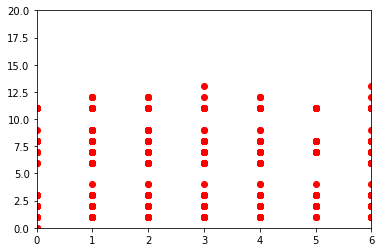

In [ ]:
import matplotlib.pyplot as plt
plt.plot(yyy_train_cat, yyy_pred_cat, 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

In [ ]:
def show_difference(pred,ytrain,df,verbose=False):
    ecounter=0
    for i in range(len(pred)):
        predi=pred[i]
        traini=y_train[i]
        if maxpos(traini)!=maxpos(predi):
            ecounter+=1
            if verbose:
                print(f"{i}, {predi}, {traini}")
                print(f"---Text: {df.iloc[i].text}")
    print(f"Hiba szám: {ecounter:6}, arány: {ecounter/len(df)*100}% ")


In [ ]:
show_difference(pred,ytrain,df_train)

In [ ]:
---

### Model usage

In [ ]:
test_converted="https://github.com/sipocz/Programming_language_classification/raw/7cf3cc4e8397c150b45e2a5abb7b0e9b1e3d8ab7/orig/test_id.csv"
!wget $test_converted

--2021-12-31 14:31:32--  https://github.com/sipocz/Programming_language_classification/raw/7cf3cc4e8397c150b45e2a5abb7b0e9b1e3d8ab7/orig/test_id.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Programming_language_classification/7cf3cc4e8397c150b45e2a5abb7b0e9b1e3d8ab7/orig/test_id.csv [following]
--2021-12-31 14:31:33--  https://raw.githubusercontent.com/sipocz/Programming_language_classification/7cf3cc4e8397c150b45e2a5abb7b0e9b1e3d8ab7/orig/test_id.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7806230 (7.4M) [text/plain]
Saving to: ‘test_id.csv.1’

test_id.csv.1       100%[===

In [ ]:
test_df=pd.read_csv("test_id.csv")

In [ ]:
print(len(test_df))

9277


In [ ]:
test_df.head(30)

In [ ]:
__MAXWORD__=400
test_word_list=list(test_df.Words_in_Numbers)
x_test=create_x(test_word_list,maxword=__MAXWORD__)

In [ ]:
x_test[25]

In [ ]:
model.load_weights("./PoLaCa_LOSS_0.22731_VACC_0.9134_VF1.xhdf5")

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred[15:30]

In [ ]:
def maxpos(l:list):

    o=[i.index(max(i)) for i in l]
    print(o)
    return(o)

In [ ]:
def ylabel_deconvert_5(sentiment):
    yout_index=maxpos(sentiment)
    
    outstr=["r","c","c-plus-plus","c-sharp","dart","f-sharp","go","java","javascript","julia","php","python","ruby","scala","swift"]
    yout=[outstr[i] for i in yout_index]   

    
    return(yout)



In [ ]:
y_pred_list=[list(y_pred_i) for y_pred_i in y_pred] 

In [ ]:
y_pred_list[27]

[0.0,
 4.361271e-14,
 8.515913e-09,
 7.504936e-36,
 0.0,
 0.0,
 1.3931645e-29,
 1.2962317e-28,
 0.0,
 3.445801e-29,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0]

In [ ]:
y_pred_str=ylabel_deconvert_5(y_pred_list)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 11, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 11, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 11, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 11, 11, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 11, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 11, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 11, 2, 2, 2, 11, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 11, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 11, 2, 2, 2, 11, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
y_pred[18]

array([0.00000000e+00, 5.19848883e-01, 4.80151117e-01, 1.23427810e-24,
       0.00000000e+00, 0.00000000e+00, 1.33996964e-17, 1.81316767e-26,
       1.24132371e-38, 8.77855049e-34, 0.00000000e+00, 4.38234267e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], dtype=float32)

In [ ]:
df_csv=pd.DataFrame()
df_csv["id"]=test_df["id"]
df_csv["prediction"]=y_pred_str

NameError: ignored

In [ ]:
df_csv.head(30)

In [ ]:
from datetime  import datetime

In [ ]:
a=datetime.now().strftime("%Y%m%d_%H%M%S")

In [ ]:
fname="submission_"+a+".csv"

In [ ]:
df_csv.to_csv(fname,index=False)

In [ ]:
!head $fname

id,prediction
10684,c-plus-plus
17536,c-plus-plus
26383,c-plus-plus
29090,c-plus-plus
10482,c-plus-plus
11952,c-plus-plus
33227,c-plus-plus
87635,c-plus-plus
29183,c-plus-plus
